<a href="https://colab.research.google.com/github/Shubham-mohapatra/naivebayes-email-spam-detection/blob/main/Naive_bayes_Spam_Email_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install pandas numpy scikit-learn nltk google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-client flask joblib


In [5]:
import pandas as pd

df = pd.read_csv('spam.csv',encoding='latin-1')
df = df[['v1','v2']]
df.rename(columns={'v1':'label','v2':'text'},inplace=True)



print(df.head())

  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [6]:
#Clean the text

import re

def clean_text(text):
  text = re.sub(r'\W',' ',text) # for special chars
  text = re.sub(r'\d',' ',text) # remove the extra digits
  text = re.sub(r'\s+',' ',text) # removes the extra spaces
  text = text.strip().lower()
  return text


df['text']  = df['text'].apply(clean_text)
print(df.head())

  label                                               text
0   ham  go until jurong point crazy available only in ...
1   ham                            ok lar joking wif u oni
2  spam  free entry in a wkly comp to win fa cup final ...
3   ham        u dun say so early hor u c already then say
4   ham  nah i don t think he goes to usf he lives arou...


In [7]:
# remove the stopwords like "is","and","the"

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  words = text.split()
  filtered_words = [word for word in words if word not in stop_words]
  return ' '.join(filtered_words)

  df['text'] = df['text'].apply(remove_stopwords)
  print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
#Tokenization og text into individual texts


def tokenize_text(text):
  return text.split()

df['tokens'] = df['text'].apply(tokenize_text)
print(df.head())

  label                                               text  \
0   ham  go until jurong point crazy available only in ...   
1   ham                            ok lar joking wif u oni   
2  spam  free entry in a wkly comp to win fa cup final ...   
3   ham        u dun say so early hor u c already then say   
4   ham  nah i don t think he goes to usf he lives arou...   

                                              tokens  
0  [go, until, jurong, point, crazy, available, o...  
1                     [ok, lar, joking, wif, u, oni]  
2  [free, entry, in, a, wkly, comp, to, win, fa, ...  
3  [u, dun, say, so, early, hor, u, c, already, t...  
4  [nah, i, don, t, think, he, goes, to, usf, he,...  


In [9]:
#using stemming and lemmatization to further reduce the words to their base form

# eg - "running" -> "run"

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

#Stemming
stemmer = PorterStemmer()
def stem_text(text):
  words = text.split()
  words = [stemmer.stem(word) for word in words]
  return ' '.join(words)


print(df.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...


  label                                               text  \
0   ham  go until jurong point crazy available only in ...   
1   ham                            ok lar joking wif u oni   
2  spam  free entry in a wkly comp to win fa cup final ...   
3   ham        u dun say so early hor u c already then say   
4   ham  nah i don t think he goes to usf he lives arou...   

                                              tokens  
0  [go, until, jurong, point, crazy, available, o...  
1                     [ok, lar, joking, wif, u, oni]  
2  [free, entry, in, a, wkly, comp, to, win, fa, ...  
3  [u, dun, say, so, early, hor, u, c, already, t...  
4  [nah, i, don, t, think, he, goes, to, usf, he,...  


In [10]:
df['label'] = df['label'].map({'ham':0,'spam':1})
print(df.head())

   label                                               text  \
0      0  go until jurong point crazy available only in ...   
1      0                            ok lar joking wif u oni   
2      1  free entry in a wkly comp to win fa cup final ...   
3      0        u dun say so early hor u c already then say   
4      0  nah i don t think he goes to usf he lives arou...   

                                              tokens  
0  [go, until, jurong, point, crazy, available, o...  
1                     [ok, lar, joking, wif, u, oni]  
2  [free, entry, in, a, wkly, comp, to, win, fa, ...  
3  [u, dun, say, so, early, hor, u, c, already, t...  
4  [nah, i, don, t, think, he, goes, to, usf, he,...  


In [11]:
#spliting the dataset

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df['text'],df['label'],test_size=0.2,random_state=42)

In [12]:
#TF-IDF Vetorization

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF vectorized training data shape : ",X_train_tfidf.shape)
print("TF-IDF vectorized testing data shape : ",X_test_tfidf.shape)

TF-IDF vectorized training data shape :  (4457, 6910)
TF-IDF vectorized testing data shape :  (1115, 6910)


In [13]:
#train naive bayes model

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import joblib

model = MultinomialNB()
model.fit(X_train_tfidf,y_train)

y_pred = model.predict(X_test_tfidf)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

joblib.dump(model, 'spam_classifier_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


Accuracy: 0.9560538116591928


['tfidf_vectorizer.pkl']

In [15]:
import joblib

model = joblib.load('spam_classifier_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

sample_text = ["This is a free offer ! Claim your prize now"]
sample_text_tfidf = vectorizer.transform(sample_text)
prediction = model.predict(sample_text_tfidf)

print("Prediciton : ", "Spam" if prediction[0] == 1 else "Not Spam")

Prediciton :  Spam


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[965   0]
 [ 49 101]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       965
           1       1.00      0.67      0.80       150

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



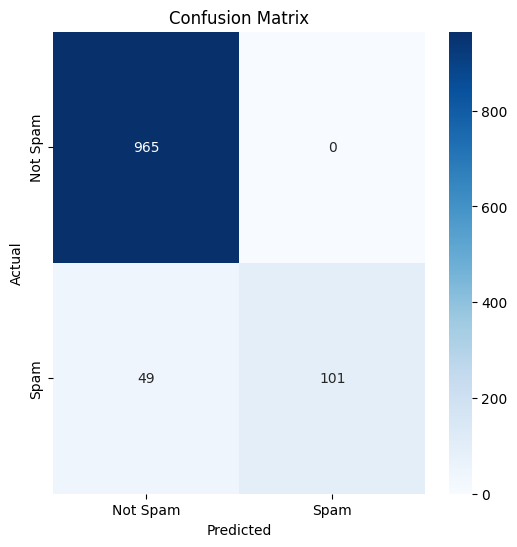

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha' : [0.1,0.5,1.0,2.0,5.0]}
grid_search = GridSearchCV(model,param_grid,cv=5)
grid_search.fit(X_train_tfidf,y_train)
print(f"Best hyperparameters : {grid_search.best_params_}")


Best hyperparameters : {'alpha': 0.1}


In [50]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(MultinomialNB(), X_train_tfidf, y_train, cv=5)
print(f"Cross-validation accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Cross-validation accuracy: 0.9558 ± 0.0015


In [51]:
new_email = ["Free lottery! You've won a prize! Click here to claim it."]
new_email_vectorized = vectorizer.transform(new_email)
prediction = model.predict(new_email_vectorized)
print("Predicted Class: Spam" if prediction else "Predicted Class: Not Spam")


Predicted Class: Spam


In [1]:
pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib


In [11]:
import joblib
import pickle
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Load your pre-trained model and vectorizer
model = joblib.load('spam_classifier_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Define the scope you want to access
SCOPES = ['https://www.googleapis.com/auth/gmail.readonly']

# Authenticate using OAuth 2.0
def authenticate_gmail():
    flow = InstalledAppFlow.from_client_secrets_file(
        'credentials.json', SCOPES)
    flow.redirect_uri = 'https://developers.google.com/oauthplayground'

    auth_url, state = flow.authorization_url(prompt='consent')
    print(f"Please visit this URL to authorize the application: {auth_url}")

    auth_code = input('Enter the authorization code: ')
    flow.fetch_token(authorization_response=f'https://developers.google.com/oauthplayground?code={auth_code}&state={state}')

    creds = flow.credentials
    with open('token.pickle', 'wb') as token:
        pickle.dump(creds, token)

    service = build('gmail', 'v1', credentials=creds)
    return service

# Authenticate and create Gmail service
service = authenticate_gmail()

# Get the list of emails from Gmail inbox
results = service.users().messages().list(userId='me').execute()
messages = results.get('messages', [])

if not messages:
    print('No messages found.')
else:
    print('Classifying emails as spam or not spam:')
    for message in messages[:5]:  # Display the first 5 emails
        msg = service.users().messages().get(userId='me', id=message['id']).execute()
        snippet = msg['snippet']  # Email snippet

        # Preprocess the email snippet (TF-IDF transformation)
        email_features = vectorizer.transform([snippet])

        # Classify using the trained model
        prediction = model.predict(email_features)

        # Print classification result
        if prediction == 1:
            print(f"Spam: {snippet}")
        else:
            print(f"Not Spam: {snippet}")


Please visit this URL to authorize the application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=850511664589-3lr7s0nufpuaug3fknc4e9a9p48gshc6.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fdevelopers.google.com%2Foauthplayground&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fgmail.readonly&state=9uKPzxQVx1b2uvG1VxrSWrjk7E6ZRE&prompt=consent&access_type=offline
Enter the authorization code: 4/0ASVgi3JULj7DPgdFs9n-WE1IFi_c7fZhQjNLYuHkaNn0c3WHnAP5bUSx0fpgFex-CkJdKA
Classifying emails as spam or not spam:
Not Spam: Building a Healthier India, One Step at a Time. If you no longer wish to receive emails from Tata 1mg, you may unsubscribe
Not Spam: Featured courses View in web browser Share on social Share on Facebook Share on Twitter Share on Linkedin Alison Explore Course Categories Login to My Courses Learn from the experts. Hi Shubham, Alison
Not Spam: Meet these game-changers. ͏ ‌ ﻿ ͏ ‌ ﻿ ͏ ‌ ﻿ ͏ ‌ ﻿ ͏ ‌ ﻿ ͏ ‌ ﻿ ͏ ‌ ﻿ ͏ ‌ ﻿ ͏ ‌ ﻿ ͏ ‌ ﻿ ͏ ‌ ﻿ ͏ ‌ ﻿ ͏ ‌ ﻿